In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb

%matplotlib inline

In [2]:
tenda_pa = pd.read_csv('tenda_propostas_PA.csv',sep=';',decimal = ',')

In [3]:
tenda_pa.dtypes

Chave unica                       object
Preco Venda                      float64
Renda_Bruta_Familiar_Proposta    float64
FGTS_familiar_Proposta           float64
dtype: object

In [4]:
tenda_pa.head()

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,PRO184681P0N7N9329904,147021.0,4023.0,9723.9
1,PRO229810S4D9C1329904,147021.0,4023.0,9723.9
2,PRO230240Y2C3C7345979,109002.5,2524.9,8203.7
3,PRO230922C9V1S6346392,160000.0,16709.9,0.0
4,PRO231378V8R3T6346498,236000.0,8418.5,0.0


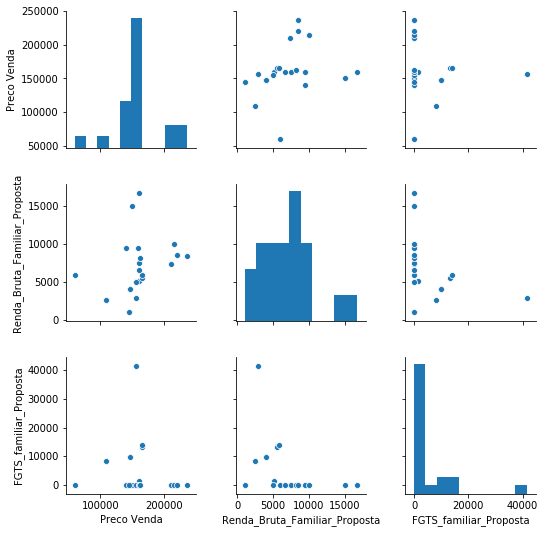

In [5]:
sb.pairplot(tenda_pa)

In [7]:
tenda_drop_pa = tenda_pa.drop(['Chave unica'],axis = 1)
tenda_drop_pa

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta
0,147021.0,4023.0,9723.9
1,147021.0,4023.0,9723.9
2,109002.5,2524.9,8203.7
3,160000.0,16709.9,0.0
4,236000.0,8418.5,0.0
5,150000.0,15000.0,0.0
6,155999.8,2898.4,41470.4
7,159000.0,9408.2,0.0
8,159999.3,5112.5,1361.6
9,165000.0,5541.9,13379.1


K_MEANS (RS)

In [8]:
from sklearn.cluster import KMeans

In [9]:
sb.set_style('darkgrid')

In [10]:
wcss = []

1 30821966952.941906
2 13356813378.16397
3 4466276953.6505
4 3389998079.6475
5 2209735057.617501
6 2172175838.49
7 812328262.9862223
8 685152853.6622223
9 557941202.7982142


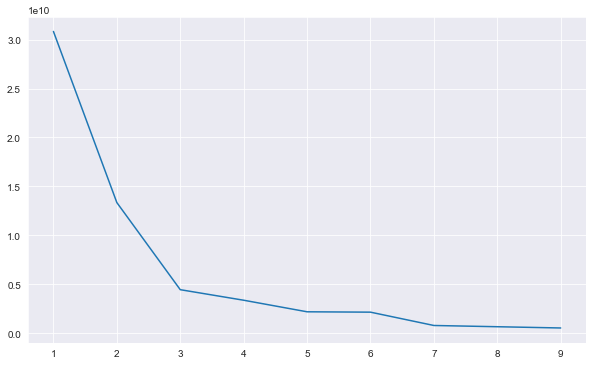

In [11]:
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(tenda_drop_pa)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
pl.figure(figsize=(10, 6))    
pl.plot(range(1, 10), wcss)    

In [12]:
kmeans = KMeans(n_clusters=3,random_state=0)

In [13]:
kmeans.fit(tenda_drop_pa)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [14]:
kmeans.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0])

CLASSES CRIADAS 

In [15]:
tenda_pa['Kclasses'] = kmeans.labels_

In [16]:
tenda_pa. head(20)

,Chave unica,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
0,PRO184681P0N7N9329904,147021.0,4023.0,9723.9,0
1,PRO229810S4D9C1329904,147021.0,4023.0,9723.9,0
2,PRO230240Y2C3C7345979,109002.5,2524.9,8203.7,1
3,PRO230922C9V1S6346392,160000.0,16709.9,0.0,0
4,PRO231378V8R3T6346498,236000.0,8418.5,0.0,2
5,PRO233384W7Q6Z769276,150000.0,15000.0,0.0,0
6,PRO233609R2X1N1347388,155999.8,2898.4,41470.4,0
7,PRO233749G8B1X3347174,159000.0,9408.2,0.0,0
8,PRO235732T0K8X2348268,159999.3,5112.5,1361.6,0
9,PRO237588K4J4H4348788,165000.0,5541.9,13379.1,0


In [17]:
tenda_pa['Kclasses'] = kmeans.labels_

In [18]:
tenda_pa.Kclasses.value_counts()

0    15
2     4
1     2
Name: Kclasses, dtype: int64

PERFIL DOS CLUSTER'S GERADOS

In [19]:
tenda_pa.describe().round(2)

,Preco Venda,Renda_Bruta_Familiar_Proposta,FGTS_familiar_Proposta,Kclasses
count,21.00,21.00,21.00,21.00
mean,160998.18,7089.80,4657.70,0.48
std,37840.73,3791.43,9736.68,0.81
min,60000.00,1000.00,0.00,0.00
25%,147021.00,5000.00,0.00,0.00
50%,159999.30,6600.00,0.00,0.00
75%,165000.00,8500.00,8203.70,1.00
max,236000.00,16709.90,41470.40,2.00


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


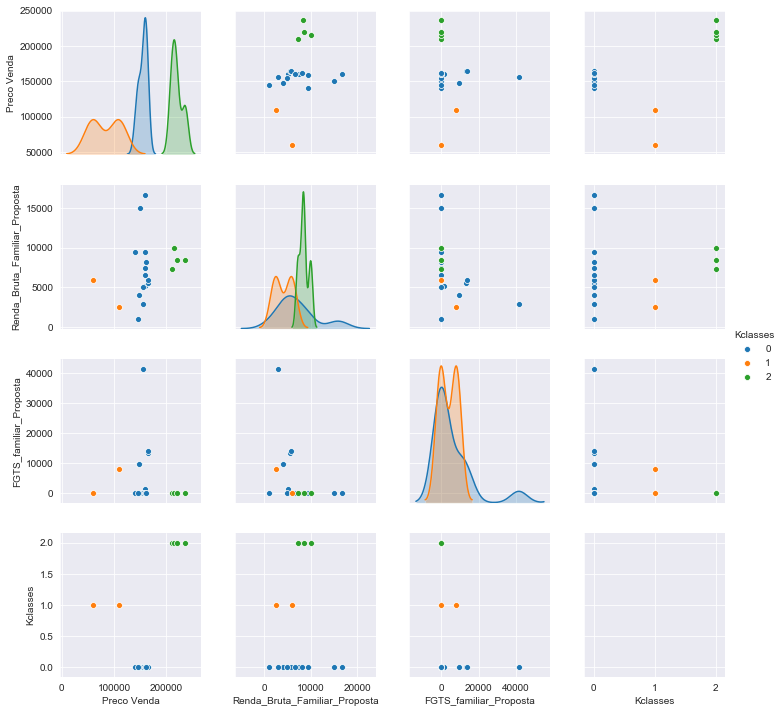

In [20]:
sb.pairplot(tenda_pa,hue='Kclasses')

EXPORTANDO DADOS

In [23]:
tenda_pa.to_csv('clustertenda_PA.csv',sep=';',decimal=',')